# Post-synaptic response of a single synapse  in an active e-model

Adapted from https://github.com/LFPy/LFPy/blob/master/examples/LFPy-example-04.ipynb

Modified by  Darshan Mandge and Ilkan Kiliç, Open Brain Institute

Copyright (c) 2025 Open Brain Institute

In this notebook, you will be able to insert a synapse using LFPy soma of the an e-mdodel. This notebook gives the users how they can use different synapses with the OBP e-models. 

If you want to use a custom synapse, copy the mod file in the mechanisms directory and update the `syntype` in the below code with the POINT_PROCESS name of your synapse mod file.

Download the e-model folder from [here](https://openbraininstitute.sharepoint.com/:f:/s/OBI-Scientificstaff/Ei3QIGh3JFFHkRkY7LRyTpEBm8eUll7HGyusulkPavf5SA?e=7ihV8H) in OneDrive `OBI - Scientific staff -> Documents ->Data -> Analysis notebook data -> cadpyr_emodel`

For this example, the downloaded folder `cadpyr_emodel` is kept here `./Cellular/emodels` of this repository

Please update the `emodel_path` variable with the path to the downloaded folder.

In [9]:
emodel_path="../../cadpyr_emodel"

In [ ]:
# compile mechanisms before before calling LFPy
import os
# !nrnivmodl ../../cadpyr_emodel/mechanisms
os.system(f"nrnivmodl {emodel_path}/mechanisms")

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import LFPy

Then, create the cell object using the `LFPy.Cell` 
class, specifying the morphology file.
The passive mechanisms
are not switched on by default.

In [12]:
# cell = LFPy.Cell(morphology=f'{emodel_path}/C060114A5.asc', 
#                  custom_code=[f'{emodel_path}/model.hoc'],
#                  passive=False)

cell = LFPy.TemplateCell(morphology  = f'{emodel_path}/C060114A5.asc',  # update the morphology file
                templatefile = f'{emodel_path}/model.hoc',              # template file from the emodel folder
                templatename = 'cADpyr_bin_4',                          # name of the template within templatefile. See the line starting with "begintemplate"
                templateargs = [0, emodel_path, 'C060114A5.asc'],
                #  custom_code=['cadpyr/model.hoc'],
                passive      = False,
                nsegs_method = None,
                dt = 2**-6,
                tstart = -159,
                tstop = 100,
                v_init = -60,
                celsius= 34,
                pt3d = True,
               )


Then, align apical dendrite with z-axis:

In [13]:
# cell.set_rotation(x=4.98919, y=-4.33261, z=0.)
# cell.set_rotation(x=4.0, y=-4.0, z=0.0)
cell.set_rotation(x=4.98919, y=9.3, z=0)

One can now use `LFPy.Synapse` class to insert a single 
synapse onto the soma compartment, and set the spike time(s) using `LFPy.Synapse.set_spike_times()` method:

In [14]:
synapse = LFPy.Synapse(cell, 
                       idx=cell.get_idx("soma[0]"),
                       syntype='Exp2Syn', 
                       weight=0.0075, 
                       e=0, 
                       tau1=0.5,
                       tau2=2,
                       record_current=True)
synapse.set_spike_times(np.array([20., 40]))

We now have what we need in order to calculate the postsynaptic response,
using a built in method `LFPy.Cell.simulate()` to run the simulation.

In [15]:
cell.simulate()

Then 
plot the model geometry, synaptic current and somatic potential:

(-500.0, 500.0, -550.0, 750.0)

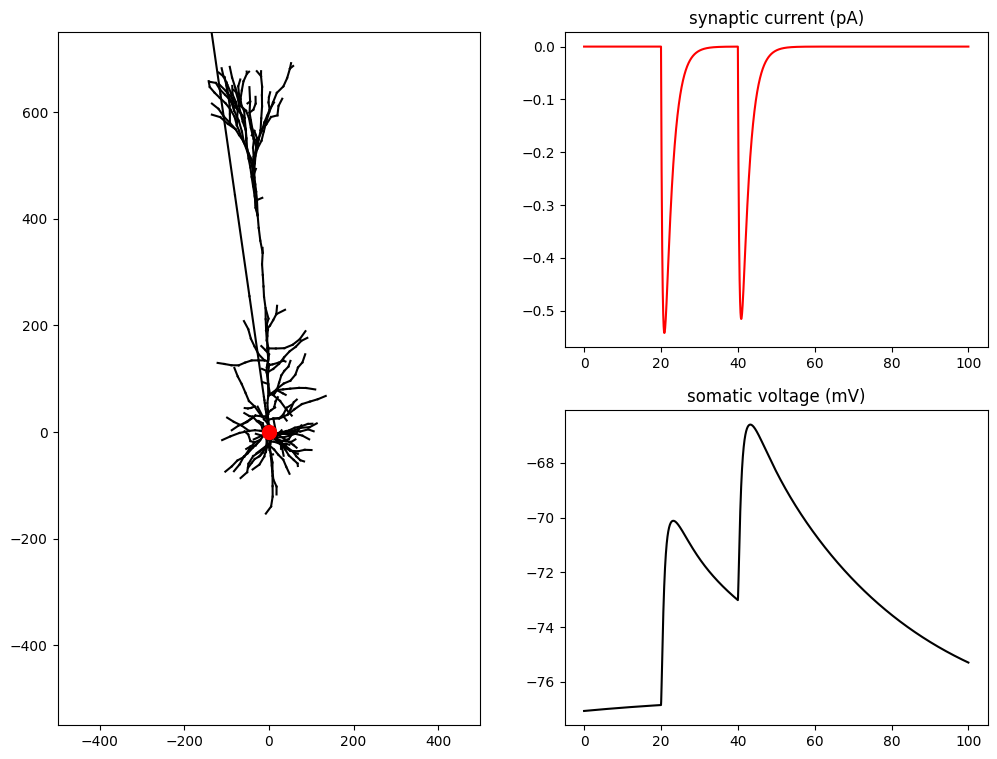

In [16]:
plt.figure(figsize=(12, 9))
plt.subplot(222)
plt.plot(cell.tvec, synapse.i, 'r')
plt.title('synaptic current (pA)')
plt.subplot(224)
plt.plot(cell.tvec, cell.somav, 'k')
plt.title('somatic voltage (mV)')
plt.subplot(121)
plt.plot(cell.x.T, cell.z.T, 'k')
plt.plot(synapse.x, synapse.z,
         color='r', marker='o', markersize=10)
plt.axis([-500, 500, -550, 750])

# savefig('LFPy-example-01.pdf', dpi=200)